# Correlation notebook
Within this notebook we will be running our statistical anaylisis on our timeseries for SST, wind, CUTI values, and trawl data

In [1]:
# import the os, numpy, matplotlib, and statsmodels.api modules
import os 
import numpy as np
import matplotlib.pyplot as plt 

# Read in Timeseries

In [2]:
# define a path to the timeseries folder
timeseries_folder = 'timeseries'

# define a time step to use for the timeseries (daily or monthly)
time_step = 'yearly'

blue_yoy_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'blue_rockfish_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

gopher_yoy_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'copper_rockfish_group_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

all_yoy_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'rockfish_total_yoy_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

wind_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'Wind_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

cuti_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'CUTI_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

sst_timeseries = np.genfromtxt(os.path.join(timeseries_folder, 'SST_' +time_step+ '_timeseries.csv'),
                               delimiter = ',')

# Make figure of all the timeseries

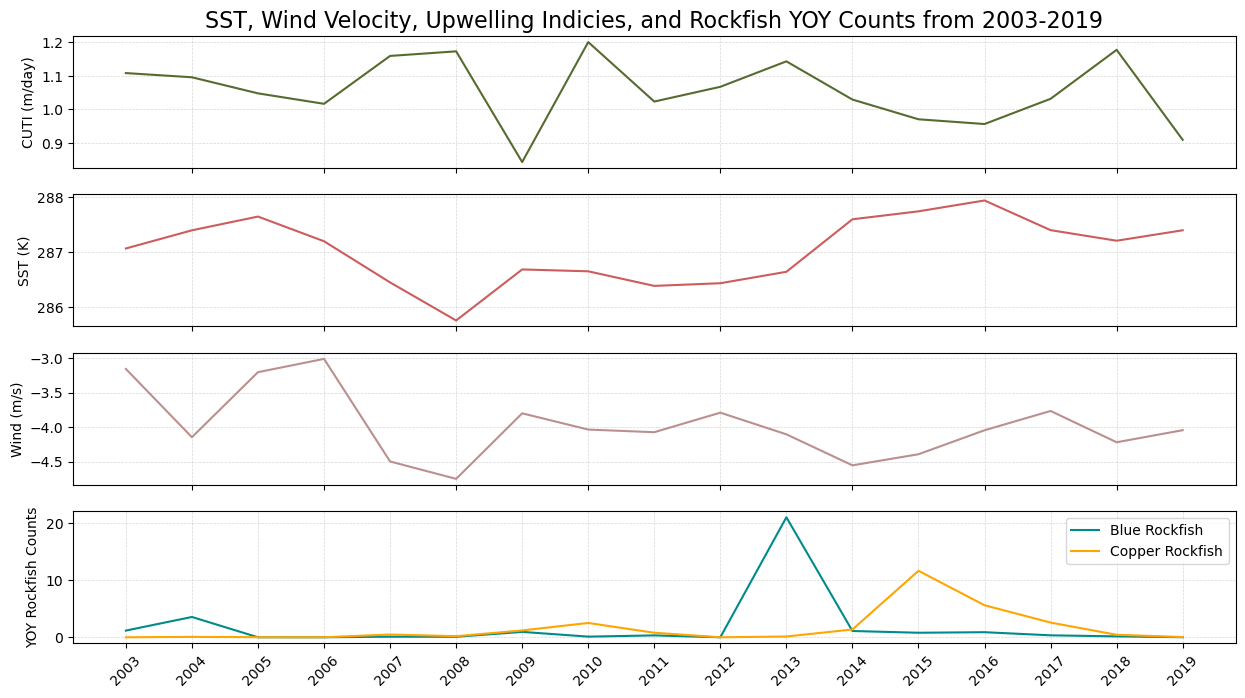

In [10]:
plt.figure(figsize=(15, 12))

plt.subplot(6,1,2)
plt.plot(sst_timeseries[:,0], sst_timeseries[:,1], color = "IndianRed") 
plt.ylabel("SST (K)")
plt.gca().set_xticklabels([])
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)


plt.subplot(6,1,3)
plt.plot(wind_timeseries[:,0], wind_timeseries[:,1], color = 'RosyBrown') 
plt.ylabel("Wind (m/s)")
plt.gca().set_xticklabels([])
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)

plt.subplot(6,1,1)
plt.plot(cuti_timeseries[:,0], cuti_timeseries[:,1], color = 'DarkOliveGreen') 
plt.ylabel("CUTI (m/day)")
plt.gca().set_xticklabels([])
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.title("SST, Wind Velocity, Upwelling Indicies, and Rockfish YOY Counts from 2003-2019", size = 16)

plt.subplot(6,1,4)
years = list(range(2003, 2020))
plt.plot(blue_yoy_timeseries[:,0], blue_yoy_timeseries[:,2], 'darkcyan', label = "Blue Rockfish") 
plt.plot(gopher_yoy_timeseries[:,0], gopher_yoy_timeseries[:,2], 'orange', label = "Copper Rockfish") 
plt.ylabel("YOY Rockfish Counts")
plt.legend()
plt.xticks(years, rotation=45)
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)

"""plt.subplot(6,1,5)
years = list(range(2003, 2020))
plt.plot(all_yoy_timeseries[:,0], all_yoy_timeseries[:,3], 'brown', label = "All Species") 
plt.ylabel("YOY Rockfish Counts")
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)"""

plt.savefig('big_time_series.png')

# Correlations between YOY catches and the environmental data

##### The first corelation will be between the Copper Complex YOY catches and the environemntal data

In [11]:
#Upwelling Indices
C = np.corrcoef(gopher_yoy_timeseries[:,2], cuti_timeseries[:,1])
r_gyoy_cuti = C[0,1]
print(r_gyoy_cuti)
p_cuti = np.polyfit(cuti_timeseries[:,1], gopher_yoy_timeseries[:,2], 1)
cuti_gyoy_estimate = p_cuti[0] * cuti_timeseries[:,1] + p_cuti[1]

#Wind
C = np.corrcoef(gopher_yoy_timeseries[:,2], wind_timeseries[:,1])
r_gyoy_wind = C[0,1]
print(r_gyoy_wind)
p_wind = np.polyfit(wind_timeseries[:,1], gopher_yoy_timeseries[:,2], 1)
wind_gyoy_estimate = p_wind[0] * wind_timeseries[:,1] + p_wind[1]


#Temperature
C = np.corrcoef(gopher_yoy_timeseries[:,2], sst_timeseries[:,1])
r_gyoy_sst = C[0,1]
print(r_gyoy_sst)
p_sst = np.polyfit(sst_timeseries[:,1], gopher_yoy_timeseries[:,2], 1)
sst_gyoy_estimate = p_sst[0] * sst_timeseries[:,1] + p_sst[1]

-0.302585052221809
-0.25961917017402464
0.448334446407868


##### Now calculate the correlation between Blue YOY catches and the environemntal data

In [12]:
C = np.corrcoef(blue_yoy_timeseries[:,2], cuti_timeseries[:,1])
r_byoy_cuti = C[0,1]
print(r_byoy_cuti)
p_cuti = np.polyfit(cuti_timeseries[:,1], blue_yoy_timeseries[:,2], 1)
cuti_byoy_estimate = p_cuti[0] * cuti_timeseries[:,1] + p_cuti[1]

C = np.corrcoef(blue_yoy_timeseries[:,2], wind_timeseries[:,1])
r_byoy_wind = C[0,1]
print(r_byoy_wind)
p_wind = np.polyfit(wind_timeseries[:,1], blue_yoy_timeseries[:,2], 1)
wind_byoy_estimate = p_wind[0] * wind_timeseries[:,1] + p_wind[1]

C = np.corrcoef(blue_yoy_timeseries[:,2], sst_timeseries[:,1])
r_byoy_sst = C[0,1]
print(r_byoy_sst)
p_sst = np.polyfit(sst_timeseries[:,1], blue_yoy_timeseries[:,2], 1)
sst_byoy_estimate = p_sst[0] * sst_timeseries[:,1] + p_sst[1]

0.20905094684776998
-0.08488296623282313
-0.11614909060072327


#### Now we are going to visualize the correlations for YOY catches and environmental data

C:\Users\msand\AppData\Local\Temp\ipykernel_41408\2073983229.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(cuti_timeseries[:,1], gopher_yoy_timeseries[:,2], 'b.', color = "orange")
C:\Users\msand\AppData\Local\Temp\ipykernel_41408\2073983229.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(cuti_timeseries[:,1], cuti_gyoy_estimate, "k-", label = "Benthic species (r = "+" {:.2f}".format(r_gyoy_cuti)+")", color = 'orange')
C:\Users\msand\AppData\Local\Temp\ipykernel_41408\2073983229.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(cuti_timeseries[:,1], blue_yoy_timeseries[:,2], 'b.', color = "darkcyan")
C:\Users\msand

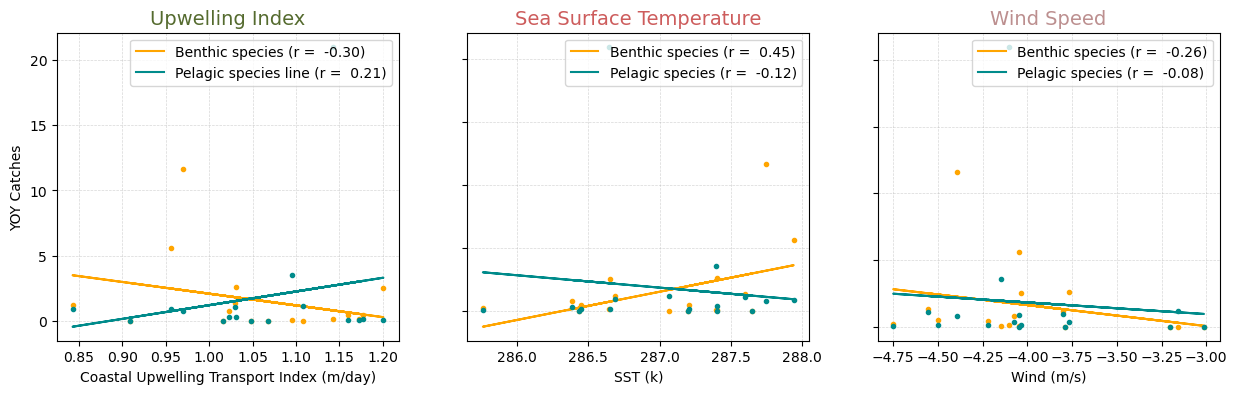

In [14]:
plt.figure(figsize=(15, 4))

#upwelling
plt.subplot(1,3,1)
plt.plot(cuti_timeseries[:,1], gopher_yoy_timeseries[:,2], 'b.', color = "orange")
plt.plot(cuti_timeseries[:,1], cuti_gyoy_estimate, "k-", label = "Benthic species (r = "+" {:.2f}".format(r_gyoy_cuti)+")", color = 'orange')
plt.plot(cuti_timeseries[:,1], blue_yoy_timeseries[:,2], 'b.', color = "darkcyan")
plt.plot(cuti_timeseries[:,1], cuti_byoy_estimate, "k-", label = "Pelagic species line (r = "+" {:.2f}".format(r_byoy_cuti)+")", color = 'darkcyan')
plt.ylabel("YOY Catches")
plt.xlabel("Coastal Upwelling Transport Index (m/day)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.legend(loc = "upper right")
plt.title("Upwelling Index", size = 14, color = "DarkOliveGreen")

#wind
plt.subplot(1,3,3)
plt.plot(wind_timeseries[:,1], gopher_yoy_timeseries[:,2], 'b.', color = "orange")
plt.plot(wind_timeseries[:,1], wind_gyoy_estimate, "k-", label = "Benthic species (r = "+" {:.2f}".format(r_gyoy_wind)+")", color = 'orange')
plt.plot(wind_timeseries[:,1], blue_yoy_timeseries[:,2], 'b.', color = "darkcyan")
plt.plot(wind_timeseries[:,1], wind_byoy_estimate, "k-", label = "Pelagic species (r = "+" {:.2f}".format(r_byoy_wind)+")", color = 'darkcyan')
plt.ylabel("")
plt.xlabel("Wind (m/s)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.gca().set_yticklabels([])
plt.legend(loc = "upper right")
plt.title("Wind Speed", size = 14, color = "RosyBrown")

#sst
plt.subplot(1,3,2)
plt.plot(sst_timeseries[:,1], gopher_yoy_timeseries[:,2], 'b.', color = "orange")
plt.plot(sst_timeseries[:,1], sst_gyoy_estimate, "k-", label = "Benthic species (r = "+" {:.2f}".format(r_gyoy_sst)+")", color = 'orange')
plt.plot(sst_timeseries[:,1], blue_yoy_timeseries[:,2], 'b.', color = "darkcyan")
plt.plot(sst_timeseries[:,1], sst_byoy_estimate, "k-", label = "Pelagic species (r = "+" {:.2f}".format(r_byoy_sst)+")", color = 'darkcyan')
plt.ylabel("")
plt.xlabel("SST (k)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.legend(loc = "upper right")
plt.gca().set_yticklabels([])
plt.title("Sea Surface Temperature", size = 14, color = "IndianRed")

plt.savefig('yoy_corr.png')

# Correlations between between remotely sensed data and coastal upwelling index



In [16]:
#Upwelling and wind
C = np.corrcoef(cuti_timeseries[:,1], wind_timeseries[:,1])
r_cuti_wind = C[0,1]
print(r_cuti_wind)
p_wind = np.polyfit(wind_timeseries[:,1], cuti_timeseries[:,1], 1)
wind_cuti_estimate = p_wind[0] * wind_timeseries[:,1] + p_wind[1]


#Upwelling and SST
C = np.corrcoef(cuti_timeseries[:,1], sst_timeseries[:,1])
r_cuti_sst = C[0,1]
print(r_cuti_sst)
p_sst = np.polyfit(sst_timeseries[:,1], cuti_timeseries[:,1], 1)
sst_cuti_estimate = p_sst[0] * sst_timeseries[:,1] + p_sst[1]


#SST and Wind
C = np.corrcoef(wind_timeseries[:,1], sst_timeseries[:,1])
r_wind_sst = C[0,1]
print(r_wind_sst)
p_wind_from_sst = np.polyfit(sst_timeseries[:,1], wind_timeseries[:,1], 1)
sst_wind_estimate = p_wind_from_sst[0] * sst_timeseries[:,1] + p_wind_from_sst[1]

-0.21936207940909336
-0.434383911626654
0.25428497379384213


#### Visualize Correlation

C:\Users\msand\AppData\Local\Temp\ipykernel_21420\1418287313.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(wind_timeseries[:,1], cuti_timeseries[:,1], 'b.', color = "black")
C:\Users\msand\AppData\Local\Temp\ipykernel_21420\1418287313.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(wind_timeseries[:,1], wind_cuti_estimate, "k-", label = "Line of Best Fit (r = "+" {:.2f}".format(r_cuti_wind)+")", color = 'black')
C:\Users\msand\AppData\Local\Temp\ipykernel_21420\1418287313.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(sst_timeseries[:,1], cuti_timeseries[:,1], 'b.', color = "black")
C:\Users\msand\AppData\Local

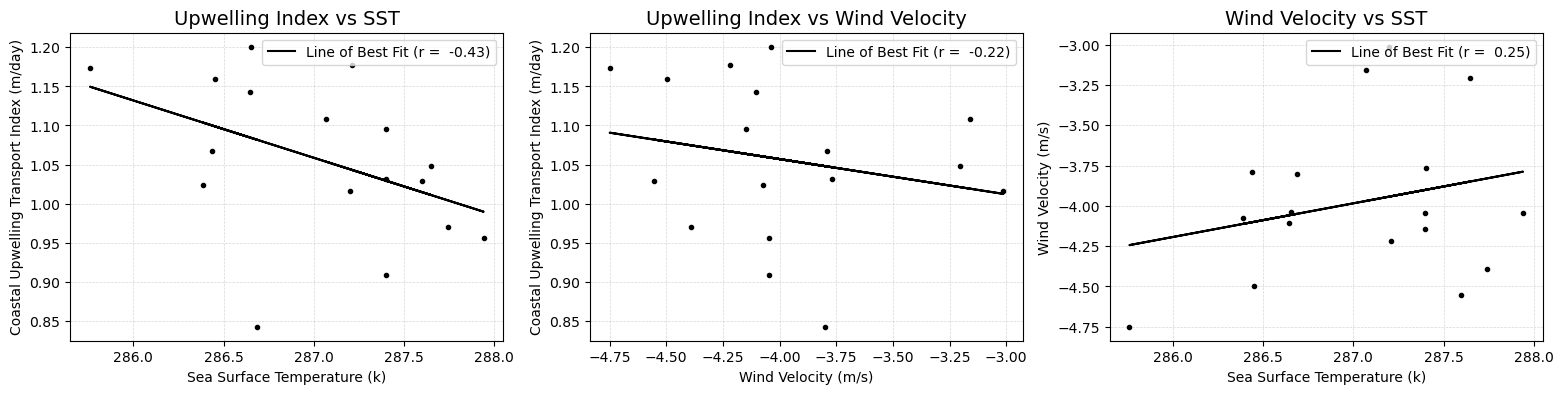

In [12]:
plt.figure(figsize=(19, 4))

#upwelling and wind
plt.subplot(1,3,2)
plt.plot(wind_timeseries[:,1], cuti_timeseries[:,1], 'b.', color = "black")
plt.plot(wind_timeseries[:,1], wind_cuti_estimate, "k-", label = "Line of Best Fit (r = "+" {:.2f}".format(r_cuti_wind)+")", color = 'black')
plt.xlabel("Wind Velocity (m/s)")
plt.ylabel("Coastal Upwelling Transport Index (m/day)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.legend(loc = "upper right")
plt.title("Upwelling Index vs Wind Velocity", size = 14)

#upwelling and sst
plt.subplot(1,3,1)
plt.plot(sst_timeseries[:,1], cuti_timeseries[:,1], 'b.', color = "black")
plt.plot(sst_timeseries[:,1], sst_cuti_estimate, "k-", label = "Line of Best Fit (r = "+" {:.2f}".format(r_cuti_sst)+")", color = 'black')
plt.xlabel("Sea Surface Temperature (k)")
plt.ylabel("Coastal Upwelling Transport Index (m/day)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.legend(loc = "upper right")
plt.title("Upwelling Index vs SST", size = 14)

#sst and wind
plt.subplot(1,3,3)
plt.plot(sst_timeseries[:,1], wind_timeseries[:,1], 'b.', color = "black")
plt.plot(sst_timeseries[:,1], sst_wind_estimate, "k-", label = "Line of Best Fit (r = "+" {:.2f}".format(r_wind_sst)+")", color = 'black')
plt.xlabel("Sea Surface Temperature (k)")
plt.ylabel("Wind Velocity (m/s)")
plt.grid(linewidth = 0.5, linestyle = "--", alpha = 0.5)
plt.legend(loc = "upper right")
plt.title("Wind Velocity vs SST", size = 14)

plt.savefig('envo_corr.png')